numpy: 1.16.1
saving
saved


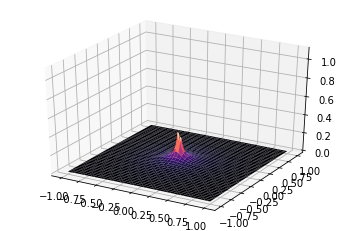

In [16]:
import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib

N = 300
fps = 10 # frame per sec
frn = 50 # frame number of the animation

x = np.linspace(-1,1,N+1)
x, y = np.meshgrid(x, x)
zarray = np.zeros((N+1, N+1, frn))

r = np.sqrt(x**2 + y**2)


f = lambda x,y,t :  0.01 * 1/(0.01 + np.sqrt(x**2 + y**2)) * np.cos(1/frn*t*2*np.pi)



for i in range(frn):
    zarray[:,:,i] = f(x,y,i)
    
    
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(x, y, zarray[:,:,frame_number], cmap="magma")

    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(x, y, zarray[:,:,0], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(0,1.1)
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(zarray, plot))

print("saving")
fn = 'plot_surface_animation_funcanimation'
ani.save(fn+'.mp4',writer='ffmpeg',fps=fps)
#ani.save(fn+'.gif',writer='imagemagick',fps=fps)
print("saved")